### Find comments with bad patterns

- Search for ANY of the mentioned words, count their number

In [1]:
file = './synonyms_adj.txt'
with open(file, 'r') as f:
    list_adj = f.read().split('\n')

In [2]:
list_adj = [el for el in list_adj if (el and not el.startswith('https'))]

In [3]:
list_adj[:10]

['confusing',
 'baffling',
 'bewildering',
 'complex',
 'complicated',
 'confounding',
 'difficult',
 'disconcerting',
 'perplexing',
 'upsetting']

In [4]:
list_adv = [el + 'ly' for el in list_adj]
list_adv[:10]

['confusingly',
 'bafflingly',
 'bewilderingly',
 'complexly',
 'complicatedly',
 'confoundingly',
 'difficultly',
 'disconcertingly',
 'perplexingly',
 'upsettingly']

In [5]:
file = '/home/anna/Documents/Diploma/code/synonyms_noun.txt'
with open(file, 'r') as f:
    list_noun = f.read().split('\n')
list_noun = [el for el in list_noun if el]
list_noun[:10]

['trouble',
 'concern',
 'inconvenience',
 'struggle',
 'discontent',
 'dissatisfaction',
 'comprehension',
 'apprehension',
 'grasp',
 'problem']

In [6]:
file = '/home/anna/Documents/Diploma/code/synonyms_verb.txt'
with open(file, 'r') as f:
    list_verb = f.read().split('\n')
list_verb = [el for el in list_verb if el]
list_verb[:10]

['confuse',
 'baffle',
 'confound',
 'disconcert',
 'frustrate',
 'obscure',
 'perplex',
 'puzzle',
 'trouble',
 'complicate']

In [7]:
file = './synonyms_adj_good.txt'
with open(file, 'r') as f:
    list_adj_good = f.read().split('\n')
    
list_adj_good = [el for el in list_adj_good if el]
list_adv_good = [el + 'ly' for el in list_adj_good]

In [8]:
overall_list = list_adj + list_adv + list_noun + list_verb + list_adj_good + list_adv_good

In [9]:
overall_set = set(overall_list)

In [10]:
path = '../other_dumps/comments'

In [11]:
import pandas as pd

In [12]:
all_texts_comments = pd.read_csv(f'{path}/all_comments_to_theories.csv')

In [13]:
all_texts_comments.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n..."
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv..."
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...


In [14]:
def words_occur(lem_text, list_words):
    try:
        lem_set = set(lem_text.split())
    except:
        print(lem_text)
        raise
    count = 0
    for word in list_words:
        if word in lem_set:
            count += 1
    return count

In [15]:
counts_bad = []

for i, row in all_texts_comments.iterrows():
    text = row.lemmatized_comments
    if isinstance(text, float):
        text = ''
    count_bad_all = words_occur(text, overall_set)
    counts_bad.append(count_bad_all)

In [16]:
all_texts_comments['count_bad'] = counts_bad

In [17]:
all_texts_comments.to_csv(f'{path}/VER1_all_comments_to_theories.csv', index=False)

In [18]:
all_texts_comments.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0


<AxesSubplot:>

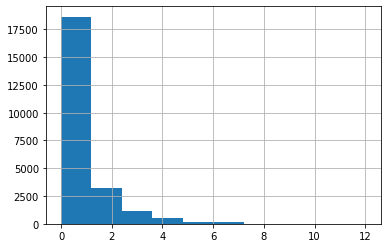

In [19]:
all_texts_comments.count_bad.hist()

In [21]:
all_texts_comments[all_texts_comments.count_bad > 0]

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4
5,15624,won't fix,comment,why are there 10 types of people when there ar...,2019-07-12 13:17:29,https://hyperskill.org/learn/step/5622,text,1,0,0,2,114,math,5622,369.0,why be there 10 type of people when there be o...,1
10,25657,won't fix,comment,Wonderful course... the best explanation on bi...,2019-08-17 12:33:00,https://hyperskill.org/learn/step/5544,text,1,0,0,0,124,math,5544,362.0,wonderful course ... the good explanation on b...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23896,1588755,new,feedback,Nothing is clear(,2022-05-27 08:42:54,https://hyperskill.org/learn/step/8061,text,1,0,0,0,17359,python,8061,624.0,nothing be clear (,1
23899,1591937,new,feedback,"It is too difficult to understand, i can not p...",2022-05-29 01:30:10,https://hyperskill.org/learn/step/11389,text,1,0,0,0,16179,python,11389,1074.0,"it be too difficult to understand , I can not ...",3
23901,1594168,new,comment,Can someone explain what kind of parameter in ...,2022-05-30 12:14:12,https://hyperskill.org/learn/step/9544,text,1,0,0,0,17125,python,9544,853.0,can someone explain what kind of parameter in ...,1
23902,1594530,new,feedback,Great!,2022-05-30 15:50:00,https://hyperskill.org/learn/step/5208,text,1,0,0,0,17479,python,5208,336.0,great !,1
